In [ ]:
import tweepy

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [ ]:
#ekstract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="@jokowi", count=100, lang="id", tweet_mode="extended")

#print the last 5 tweets form the account
print("show the 5 recent tweet: \n")  
#and lt show the tweet from zero to five
i = 1
for tweet in posts [0:10]:
    print(str(i)+') '+tweet.full_text  + '\n')
    i=i+1

show the 5 recent tweet: 

1) Tahun 2021 juga tetap kita isi dengan pembangunan infrastruktur dan sumber daya manusia seperti yang telah dicanangkan. 

Anggaran besar kita kucurkan untuk pembangunan bendungan, jaringan irigasi, jalan, jalur kereta api, bandara, sampai rumah-rumah susun di seluruh Indonesia.

2) Tahun ini, pemerintah akan menggelar vaksinasi massal Covid-19. Indonesia telah mengamankan pasokan vaksin dari Sinovac, Novavax, AstraZeneca, dan BioNTech-Pfizer. 

Pemerintah juga melanjutkan program perlindungan sosial seperti kartu sembako, bansos tunai, Kartu Prakerja, dll.

3) Kita memasuki tahun 2021 dengan langkah yang lebih tegap. Pelajaran yang mahal, pengorbanan tiada tepermanai selama masa pandemi, membuat kita lebih siap. 

Mari bersama-sama melangkah melewati ambang tahun yang baru ini dengan penuh semangat dan harapan. https://t.co/LRHYSxgjak

4) 2020 adalah tahun penuh ujian dan tantangan yang berdampak pada semua bidang kehidupan selain kesehatan dan perekonomia

In [ ]:
import pandas as pd
#membuat dataframe dan sebuah collumn yang kita akan namakan tweet
df=pd.DataFrame([tweet.full_text  for tweet in posts], columns=['Tweets'])
#show 5 data 

df.head()

,Tweets
0,Tahun 2021 juga tetap kita isi dengan pembangu...
1,"Tahun ini, pemerintah akan menggelar vaksinasi..."
2,Kita memasuki tahun 2021 dengan langkah yang l...
3,2020 adalah tahun penuh ujian dan tantangan ya...
4,"Sepanjang 2020, di tengah pergulatan menangani..."


In [ ]:
import re,string
#we have to clean text
#create a fungction to clean teh tweets
 #kita akan menggunakan fungction clean dan dia akan memabwa beberapa take
def cleanTxt(text):
    #dan we are going to set text equals to the removal of these words and symbol
 #untuk remove @mentioned
    text = re.sub(r'@[A-Za-z-0-9]+','',text) #r memberi tahu python bawah the expression is raw string
   #for removing hashtag
    text = re.sub(r'#','',text)
    #remove rt
    text = re.sub(r'RT[\s]+','',text)#Removing RT
    text = re.sub(r'https?:\/\/\S+','',text)#removelink
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text
#clean proccess
#applied text fungction above 
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#show the cleaned text
df

,Tweets
0,Tahun 2021 juga tetap kita isi dengan pembangu...
1,Tahun ini pemerintah akan menggelar vaksinasi ...
2,Kita memasuki tahun 2021 dengan langkah yang l...
3,2020 adalah tahun penuh ujian dan tantangan ya...
4,Sepanjang 2020 di tengah pergulatan menangani ...
...,...
95,Pencalonan ini bukanlah untuk gagahgagahan mel...
96,Indonesia mengajukan diri jadi tuan rumah Oli...
97,Apresiasi yang tinggi bagi para penggerak keru...
98,Kerukunan antarumat beragama di negeri ini tid...


In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
df['Tweets'] = df['Tweets'].apply(deEmojify)
df

,Tweets
0,Tahun 2021 juga tetap kita isi dengan pembangu...
1,"Tahun ini, pemerintah akan menggelar vaksinasi..."
2,Kita memasuki tahun 2021 dengan langkah yang l...
3,2020 adalah tahun penuh ujian dan tantangan ya...
4,"Sepanjang 2020, di tengah pergulatan menangani..."
...,...
95,"Pencalonan ini bukanlah untuk gagah-gagahan, m..."
96,Indonesia mengajukan diri jadi tuan rumah Oli...
97,Apresiasi yang tinggi bagi para penggerak keru...
98,Kerukunan antarumat beragama di negeri ini tid...


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize #libray untuk tokenizing
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()+more
 
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
s = 'Aku pernah mendengar Aisya bercerita bahwa sebenarnya ia tidak terlalu senang dengan kabar perjodohan yang diatur oleh orang tuanya.'
 


Aku pernah mendengar Aisya bercerita sebenarnya tidak terlalu senang kabar yang oleh orang tuanya.


In [ ]:

def prepro(data):
    dataB=[]
    for i in df['Tweets']:                   
        casefold = i.lower();
        stopW = stopword.remove(casefold)   
        stemming = stemmer.stem(stopW)
        dataB.append(stemming)
    return dataB


df['prepro'] =df.apply(prepro)


In [ ]:
df

,Tweets,prepro
0,Tahun 2021 juga tetap kita isi dengan pembangu...,tahun 2021 tetap isi bangun infrastruktur sumb...
1,Tahun ini pemerintah akan menggelar vaksinasi ...,tahun perintah gelar vaksinasi massal covid19 ...
2,Kita memasuki tahun 2021 dengan langkah yang l...,pasuk tahun 2021 langkah lebih tegap ajar maha...
3,2020 adalah tahun penuh ujian dan tantangan ya...,2020 tahun penuh uji tantang dampak semua bida...
4,Sepanjang 2020 di tengah pergulatan menangani ...,panjang 2020 tengah gulat tangan pandemi tetap...
...,...,...
95,Pencalonan ini bukanlah untuk gagahgagahan mel...,calon bukan gagahgagahan salah satu cara tingk...
96,Indonesia mengajukan diri jadi tuan rumah Oli...,indonesia aju diri jadi tuan rumah olimpiade 2...
97,Apresiasi yang tinggi bagi para penggerak keru...,apresiasi tinggi para gerak rukun umat agama d...
98,Kerukunan antarumat beragama di negeri ini tid...,rukun antarumat agama negeri tidak muncul tiba...


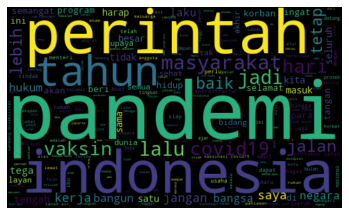

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plot the word cloud 
allWord = ' '.join([twts for twts in df['prepro']])
#sekarang kita akan memanggil verbal word cloud
wordCloud = WordCloud(width = 500,height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
 
def word_feats(words):
    return dict([(word, True) for word in words])

def bentukClassifier(P,Ne,Nt):
    positive_features = [(word_feats(pos), 'pos') for pos in P]
    negative_features = [(word_feats(neg), 'neg') for neg in Ne]
    neutral_features = [(word_feats(neu), 'neu') for neu in Nt]
    train_set = negative_features + positive_features + neutral_features
    return NaiveBayesClassifier.train(train_set)

def prediksiSentiment(sentence, model):
    pos, neg = 0, 0
    words = sentence.lower().split(' ')
    for word in words:
        classResult = model.classify( word_feats(word))
        if classResult == neg:
            neg = neg + 1
        if classResult == pos:
            pos = pos + 1
    if pos > neg:
        return 'positive'
    elif pos==neg:
        return 'netral'
    else:
        return 'negative'


In [ ]:

P = ['bagus','keren','suka','suka banget']
Ne = [ 'jelek', 'benci','buruk', 'najis', ':(']
Nt = [ 'bakso','film','pisang','pagi','makan','kopi','minum','sambil','abis']

model = bentukClassifier(P,Ne,Nt)

In [ ]:
sentence="alhamdulillah "
prediksiSentiment(sentence,model)

'netral'

In [ ]:
positive_words

In [ ]:
negative_words